# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

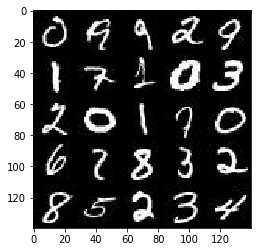

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

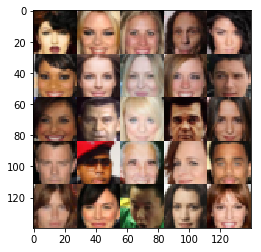

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [85]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [107]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x1 or 28x28x3
        x1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.1 * x1, x1)
        # 14x14x32
    
        x2 = tf.layers.conv2d(relu1, 64, 5, strides=1, padding='same')
        x2 = tf.layers.dropout(x2, rate=0.2)
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.1 * bn2, bn2)
        # 14x14x64
        
        x3 = tf.layers.conv2d(relu2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.dropout(x3, rate=0.2)
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.1 * bn3, bn3)
        # 7x7x128

        # Flatten it
        flat = tf.reshape(relu2, (-1, 7*7*128))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [108]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(0.1 * x1, x1)
        # 7x7x256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 64, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(0.1 * x2, x2)
        # 14x14x64 now
        
        x3 = tf.layers.conv2d_transpose(x2, 32, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(0.1 * x3, x3)
        # 28x28x32 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [109]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [110]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [111]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [112]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, learning_rate2 = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
      
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate2, beta1)
    

    losses = []
    steps = 0

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
          
                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images*2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))


                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate2: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learning_rate2: learning_rate})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    
                    _ = show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.9161... Generator Loss: 0.2768
Epoch 1/2... Discriminator Loss: 1.9502... Generator Loss: 0.4135
Epoch 1/2... Discriminator Loss: 1.7822... Generator Loss: 0.5228
Epoch 1/2... Discriminator Loss: 1.3093... Generator Loss: 0.7123
Epoch 1/2... Discriminator Loss: 1.2881... Generator Loss: 0.7288
Epoch 1/2... Discriminator Loss: 1.1619... Generator Loss: 0.7630
Epoch 1/2... Discriminator Loss: 1.3865... Generator Loss: 0.6655
Epoch 1/2... Discriminator Loss: 1.3638... Generator Loss: 0.6584
Epoch 1/2... Discriminator Loss: 1.3882... Generator Loss: 0.6129
Epoch 1/2... Discriminator Loss: 1.4386... Generator Loss: 0.6468


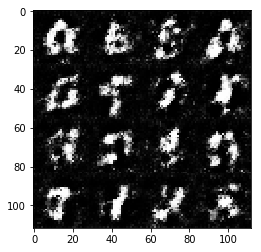

Epoch 1/2... Discriminator Loss: 1.6145... Generator Loss: 0.5665
Epoch 1/2... Discriminator Loss: 1.5769... Generator Loss: 0.5777
Epoch 1/2... Discriminator Loss: 1.4808... Generator Loss: 0.6402
Epoch 1/2... Discriminator Loss: 1.3644... Generator Loss: 0.6780
Epoch 1/2... Discriminator Loss: 1.3732... Generator Loss: 0.6474
Epoch 1/2... Discriminator Loss: 1.3588... Generator Loss: 0.7220
Epoch 1/2... Discriminator Loss: 1.3563... Generator Loss: 0.6991
Epoch 1/2... Discriminator Loss: 1.3654... Generator Loss: 0.6835
Epoch 1/2... Discriminator Loss: 1.3151... Generator Loss: 0.7948
Epoch 1/2... Discriminator Loss: 1.2668... Generator Loss: 0.7743


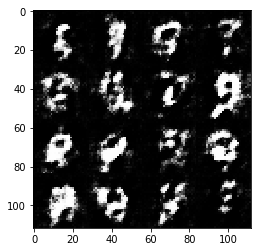

Epoch 1/2... Discriminator Loss: 1.2417... Generator Loss: 0.7613
Epoch 1/2... Discriminator Loss: 1.2527... Generator Loss: 0.7019
Epoch 1/2... Discriminator Loss: 1.3642... Generator Loss: 0.7035
Epoch 1/2... Discriminator Loss: 1.2390... Generator Loss: 0.7520
Epoch 1/2... Discriminator Loss: 1.2353... Generator Loss: 0.6513
Epoch 1/2... Discriminator Loss: 1.2346... Generator Loss: 0.6538
Epoch 1/2... Discriminator Loss: 1.1710... Generator Loss: 0.8419
Epoch 1/2... Discriminator Loss: 1.2375... Generator Loss: 0.7556
Epoch 1/2... Discriminator Loss: 1.2209... Generator Loss: 0.6995
Epoch 1/2... Discriminator Loss: 1.2094... Generator Loss: 0.8187


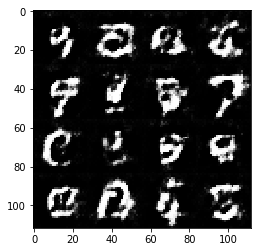

Epoch 1/2... Discriminator Loss: 1.1619... Generator Loss: 0.8023
Epoch 1/2... Discriminator Loss: 1.1317... Generator Loss: 0.7251
Epoch 1/2... Discriminator Loss: 1.2090... Generator Loss: 0.9761
Epoch 1/2... Discriminator Loss: 1.1567... Generator Loss: 0.7212
Epoch 1/2... Discriminator Loss: 1.1125... Generator Loss: 0.7681
Epoch 1/2... Discriminator Loss: 1.1628... Generator Loss: 0.7010
Epoch 1/2... Discriminator Loss: 1.1643... Generator Loss: 0.7778
Epoch 1/2... Discriminator Loss: 1.1713... Generator Loss: 0.9391
Epoch 1/2... Discriminator Loss: 1.1791... Generator Loss: 1.0076
Epoch 1/2... Discriminator Loss: 1.2858... Generator Loss: 0.6180


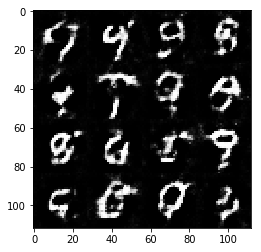

Epoch 1/2... Discriminator Loss: 1.0684... Generator Loss: 0.9911
Epoch 1/2... Discriminator Loss: 1.1970... Generator Loss: 0.6713
Epoch 1/2... Discriminator Loss: 1.1561... Generator Loss: 0.7997
Epoch 1/2... Discriminator Loss: 1.2763... Generator Loss: 0.7642
Epoch 1/2... Discriminator Loss: 1.2366... Generator Loss: 0.8971
Epoch 1/2... Discriminator Loss: 1.2832... Generator Loss: 0.8648
Epoch 1/2... Discriminator Loss: 1.2301... Generator Loss: 1.0435
Epoch 1/2... Discriminator Loss: 1.1852... Generator Loss: 0.8336
Epoch 1/2... Discriminator Loss: 1.3011... Generator Loss: 0.7941
Epoch 1/2... Discriminator Loss: 1.2829... Generator Loss: 0.7292


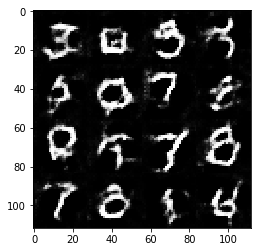

Epoch 1/2... Discriminator Loss: 1.3022... Generator Loss: 0.7059
Epoch 1/2... Discriminator Loss: 1.3448... Generator Loss: 1.1103
Epoch 1/2... Discriminator Loss: 1.3128... Generator Loss: 0.5833
Epoch 1/2... Discriminator Loss: 1.2775... Generator Loss: 0.7551
Epoch 1/2... Discriminator Loss: 1.2657... Generator Loss: 0.8195
Epoch 1/2... Discriminator Loss: 1.3304... Generator Loss: 0.7963
Epoch 1/2... Discriminator Loss: 1.3183... Generator Loss: 0.8593
Epoch 1/2... Discriminator Loss: 1.3642... Generator Loss: 0.5539
Epoch 1/2... Discriminator Loss: 1.3249... Generator Loss: 0.5526
Epoch 1/2... Discriminator Loss: 1.3021... Generator Loss: 0.7995


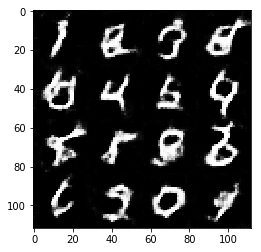

Epoch 1/2... Discriminator Loss: 1.3085... Generator Loss: 0.7352
Epoch 1/2... Discriminator Loss: 1.3026... Generator Loss: 0.7553
Epoch 1/2... Discriminator Loss: 1.3444... Generator Loss: 0.9936
Epoch 1/2... Discriminator Loss: 1.3084... Generator Loss: 0.7126
Epoch 1/2... Discriminator Loss: 1.3177... Generator Loss: 0.7393
Epoch 1/2... Discriminator Loss: 1.2796... Generator Loss: 0.9861
Epoch 1/2... Discriminator Loss: 1.2890... Generator Loss: 0.8023
Epoch 1/2... Discriminator Loss: 1.4395... Generator Loss: 0.4848
Epoch 1/2... Discriminator Loss: 1.3317... Generator Loss: 0.6327
Epoch 1/2... Discriminator Loss: 1.2389... Generator Loss: 0.7647


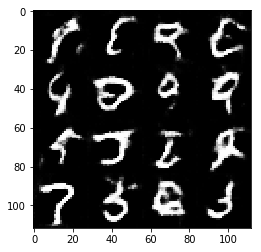

Epoch 1/2... Discriminator Loss: 1.2588... Generator Loss: 0.8461
Epoch 1/2... Discriminator Loss: 1.2914... Generator Loss: 0.6766
Epoch 1/2... Discriminator Loss: 1.2989... Generator Loss: 0.6188
Epoch 1/2... Discriminator Loss: 1.3598... Generator Loss: 0.7844
Epoch 1/2... Discriminator Loss: 1.3559... Generator Loss: 0.5307
Epoch 1/2... Discriminator Loss: 1.3811... Generator Loss: 0.8579
Epoch 1/2... Discriminator Loss: 1.2663... Generator Loss: 0.7227
Epoch 1/2... Discriminator Loss: 1.3615... Generator Loss: 0.5224
Epoch 1/2... Discriminator Loss: 1.3907... Generator Loss: 1.1031
Epoch 1/2... Discriminator Loss: 1.3666... Generator Loss: 0.6216


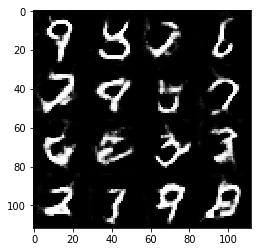

Epoch 1/2... Discriminator Loss: 1.2588... Generator Loss: 0.8657
Epoch 1/2... Discriminator Loss: 1.2934... Generator Loss: 0.8340
Epoch 1/2... Discriminator Loss: 1.3033... Generator Loss: 0.7819
Epoch 1/2... Discriminator Loss: 1.3399... Generator Loss: 0.6647
Epoch 1/2... Discriminator Loss: 1.2872... Generator Loss: 0.6157
Epoch 1/2... Discriminator Loss: 1.2989... Generator Loss: 0.6694
Epoch 1/2... Discriminator Loss: 1.3325... Generator Loss: 0.8964
Epoch 1/2... Discriminator Loss: 1.2317... Generator Loss: 0.6764
Epoch 1/2... Discriminator Loss: 1.2738... Generator Loss: 0.8429
Epoch 1/2... Discriminator Loss: 1.3195... Generator Loss: 0.6487


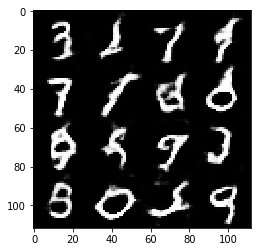

Epoch 1/2... Discriminator Loss: 1.2927... Generator Loss: 0.6181
Epoch 1/2... Discriminator Loss: 1.2440... Generator Loss: 0.7807
Epoch 1/2... Discriminator Loss: 1.2828... Generator Loss: 0.5939
Epoch 2/2... Discriminator Loss: 1.2106... Generator Loss: 0.7455
Epoch 2/2... Discriminator Loss: 1.3535... Generator Loss: 0.8222
Epoch 2/2... Discriminator Loss: 1.2781... Generator Loss: 0.7017
Epoch 2/2... Discriminator Loss: 1.2663... Generator Loss: 0.7322
Epoch 2/2... Discriminator Loss: 1.2830... Generator Loss: 0.6510
Epoch 2/2... Discriminator Loss: 1.2358... Generator Loss: 0.6238
Epoch 2/2... Discriminator Loss: 1.2815... Generator Loss: 0.6021


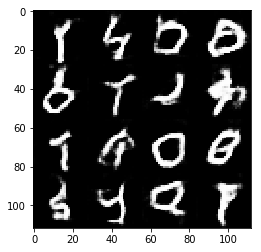

Epoch 2/2... Discriminator Loss: 1.2923... Generator Loss: 0.6007
Epoch 2/2... Discriminator Loss: 1.2281... Generator Loss: 0.7820
Epoch 2/2... Discriminator Loss: 1.2581... Generator Loss: 0.9892
Epoch 2/2... Discriminator Loss: 1.2914... Generator Loss: 0.6940
Epoch 2/2... Discriminator Loss: 1.2502... Generator Loss: 0.6789
Epoch 2/2... Discriminator Loss: 1.2884... Generator Loss: 0.6240
Epoch 2/2... Discriminator Loss: 1.2435... Generator Loss: 0.7968
Epoch 2/2... Discriminator Loss: 1.2429... Generator Loss: 0.6831
Epoch 2/2... Discriminator Loss: 1.2280... Generator Loss: 0.7791
Epoch 2/2... Discriminator Loss: 1.2226... Generator Loss: 0.7223


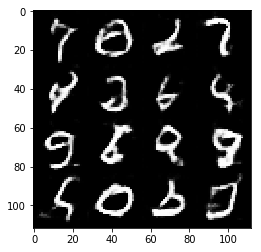

Epoch 2/2... Discriminator Loss: 1.2269... Generator Loss: 0.7591
Epoch 2/2... Discriminator Loss: 1.2378... Generator Loss: 0.6031
Epoch 2/2... Discriminator Loss: 1.2328... Generator Loss: 0.7999
Epoch 2/2... Discriminator Loss: 1.2739... Generator Loss: 0.5875
Epoch 2/2... Discriminator Loss: 1.2205... Generator Loss: 0.6851
Epoch 2/2... Discriminator Loss: 1.2670... Generator Loss: 0.5600
Epoch 2/2... Discriminator Loss: 1.2661... Generator Loss: 1.0034
Epoch 2/2... Discriminator Loss: 1.2454... Generator Loss: 0.6353
Epoch 2/2... Discriminator Loss: 1.2571... Generator Loss: 0.7859
Epoch 2/2... Discriminator Loss: 1.2668... Generator Loss: 0.6459


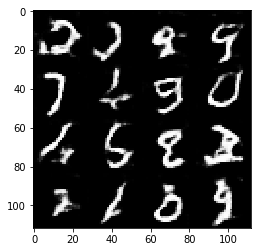

Epoch 2/2... Discriminator Loss: 1.4056... Generator Loss: 1.2318
Epoch 2/2... Discriminator Loss: 1.2541... Generator Loss: 0.6712
Epoch 2/2... Discriminator Loss: 1.2306... Generator Loss: 0.6508
Epoch 2/2... Discriminator Loss: 1.2508... Generator Loss: 0.5988
Epoch 2/2... Discriminator Loss: 1.3613... Generator Loss: 0.9668
Epoch 2/2... Discriminator Loss: 1.2256... Generator Loss: 0.8389
Epoch 2/2... Discriminator Loss: 1.2258... Generator Loss: 0.7960
Epoch 2/2... Discriminator Loss: 1.1551... Generator Loss: 0.7893
Epoch 2/2... Discriminator Loss: 1.1509... Generator Loss: 0.7846
Epoch 2/2... Discriminator Loss: 1.1643... Generator Loss: 0.6877


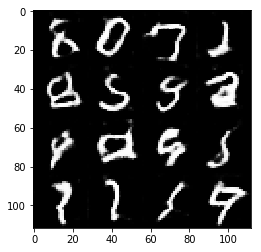

Epoch 2/2... Discriminator Loss: 1.2295... Generator Loss: 0.6295
Epoch 2/2... Discriminator Loss: 1.2851... Generator Loss: 0.5389
Epoch 2/2... Discriminator Loss: 1.2593... Generator Loss: 0.6422
Epoch 2/2... Discriminator Loss: 1.2096... Generator Loss: 0.8218
Epoch 2/2... Discriminator Loss: 1.1858... Generator Loss: 0.9459
Epoch 2/2... Discriminator Loss: 1.1864... Generator Loss: 0.8100
Epoch 2/2... Discriminator Loss: 1.2656... Generator Loss: 0.8161
Epoch 2/2... Discriminator Loss: 1.2323... Generator Loss: 0.7630
Epoch 2/2... Discriminator Loss: 1.2895... Generator Loss: 0.5100
Epoch 2/2... Discriminator Loss: 1.2322... Generator Loss: 1.1494


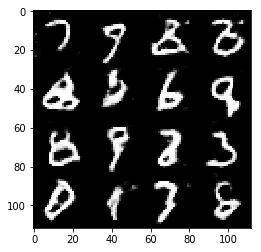

Epoch 2/2... Discriminator Loss: 1.2072... Generator Loss: 0.6787
Epoch 2/2... Discriminator Loss: 1.3404... Generator Loss: 0.4530
Epoch 2/2... Discriminator Loss: 1.1945... Generator Loss: 0.7197
Epoch 2/2... Discriminator Loss: 1.1966... Generator Loss: 0.8941
Epoch 2/2... Discriminator Loss: 1.2172... Generator Loss: 0.6469
Epoch 2/2... Discriminator Loss: 1.1791... Generator Loss: 0.7909
Epoch 2/2... Discriminator Loss: 1.1725... Generator Loss: 0.8540
Epoch 2/2... Discriminator Loss: 1.2251... Generator Loss: 0.8950
Epoch 2/2... Discriminator Loss: 1.2160... Generator Loss: 0.6338
Epoch 2/2... Discriminator Loss: 1.1971... Generator Loss: 0.7373


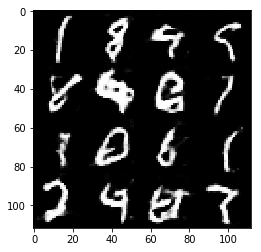

Epoch 2/2... Discriminator Loss: 1.2345... Generator Loss: 0.6395
Epoch 2/2... Discriminator Loss: 1.2096... Generator Loss: 0.6871
Epoch 2/2... Discriminator Loss: 1.1758... Generator Loss: 0.7692
Epoch 2/2... Discriminator Loss: 1.2166... Generator Loss: 0.6839
Epoch 2/2... Discriminator Loss: 1.1842... Generator Loss: 0.6017
Epoch 2/2... Discriminator Loss: 1.2602... Generator Loss: 0.5843
Epoch 2/2... Discriminator Loss: 1.1463... Generator Loss: 0.9585
Epoch 2/2... Discriminator Loss: 1.2087... Generator Loss: 0.6834
Epoch 2/2... Discriminator Loss: 1.2405... Generator Loss: 1.0943
Epoch 2/2... Discriminator Loss: 1.2167... Generator Loss: 0.7137


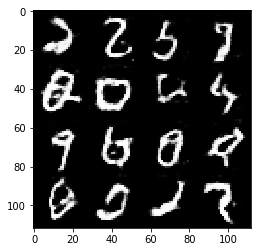

Epoch 2/2... Discriminator Loss: 1.1697... Generator Loss: 0.7866
Epoch 2/2... Discriminator Loss: 1.1885... Generator Loss: 0.7307
Epoch 2/2... Discriminator Loss: 1.1783... Generator Loss: 0.5799
Epoch 2/2... Discriminator Loss: 1.2915... Generator Loss: 0.4705
Epoch 2/2... Discriminator Loss: 1.2045... Generator Loss: 0.6972
Epoch 2/2... Discriminator Loss: 1.1899... Generator Loss: 0.6506
Epoch 2/2... Discriminator Loss: 1.1766... Generator Loss: 0.7076
Epoch 2/2... Discriminator Loss: 1.1527... Generator Loss: 0.8859
Epoch 2/2... Discriminator Loss: 1.2083... Generator Loss: 1.1351
Epoch 2/2... Discriminator Loss: 1.1587... Generator Loss: 0.6756


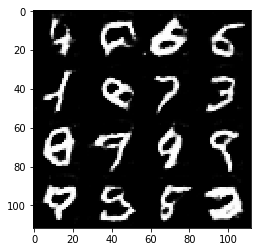

Epoch 2/2... Discriminator Loss: 1.1302... Generator Loss: 0.6904
Epoch 2/2... Discriminator Loss: 1.1962... Generator Loss: 0.6932
Epoch 2/2... Discriminator Loss: 1.1629... Generator Loss: 0.8507
Epoch 2/2... Discriminator Loss: 1.2138... Generator Loss: 0.7937
Epoch 2/2... Discriminator Loss: 1.0947... Generator Loss: 0.7772
Epoch 2/2... Discriminator Loss: 1.1900... Generator Loss: 1.0934
Epoch 2/2... Discriminator Loss: 1.1453... Generator Loss: 0.8595
Epoch 2/2... Discriminator Loss: 1.1300... Generator Loss: 0.8952
Epoch 2/2... Discriminator Loss: 1.1086... Generator Loss: 0.7480
Epoch 2/2... Discriminator Loss: 1.1449... Generator Loss: 0.7257


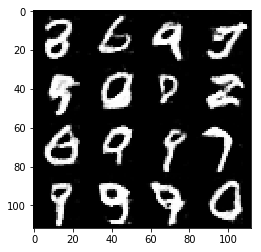

Epoch 2/2... Discriminator Loss: 1.6189... Generator Loss: 0.2953
Epoch 2/2... Discriminator Loss: 1.3508... Generator Loss: 0.5783
Epoch 2/2... Discriminator Loss: 1.3118... Generator Loss: 0.5113
Epoch 2/2... Discriminator Loss: 1.1950... Generator Loss: 0.8065
Epoch 2/2... Discriminator Loss: 1.2329... Generator Loss: 0.9068
Epoch 2/2... Discriminator Loss: 1.1291... Generator Loss: 0.8760
Epoch 2/2... Discriminator Loss: 1.2192... Generator Loss: 0.5574


In [113]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.3141... Generator Loss: 0.2115
Epoch 1/1... Discriminator Loss: 2.0636... Generator Loss: 0.3098
Epoch 1/1... Discriminator Loss: 1.8977... Generator Loss: 0.4388
Epoch 1/1... Discriminator Loss: 1.4780... Generator Loss: 0.5533
Epoch 1/1... Discriminator Loss: 1.3092... Generator Loss: 0.7019
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 0.7208
Epoch 1/1... Discriminator Loss: 1.2066... Generator Loss: 0.8700
Epoch 1/1... Discriminator Loss: 1.5867... Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 1.3015... Generator Loss: 0.7473


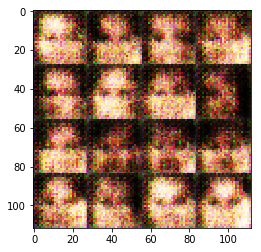

Epoch 1/1... Discriminator Loss: 1.2191... Generator Loss: 0.8271
Epoch 1/1... Discriminator Loss: 1.5675... Generator Loss: 0.7112
Epoch 1/1... Discriminator Loss: 1.1237... Generator Loss: 1.0034
Epoch 1/1... Discriminator Loss: 1.5819... Generator Loss: 0.6030
Epoch 1/1... Discriminator Loss: 1.5510... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.1580... Generator Loss: 0.8656
Epoch 1/1... Discriminator Loss: 1.5103... Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 0.7910
Epoch 1/1... Discriminator Loss: 1.2805... Generator Loss: 0.9229
Epoch 1/1... Discriminator Loss: 1.3011... Generator Loss: 0.7048


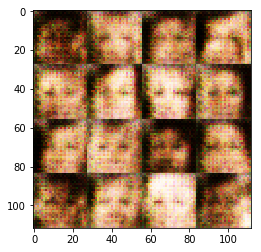

Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.7716
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 0.8847
Epoch 1/1... Discriminator Loss: 1.2850... Generator Loss: 0.8933
Epoch 1/1... Discriminator Loss: 0.9083... Generator Loss: 1.2408
Epoch 1/1... Discriminator Loss: 0.9541... Generator Loss: 0.9043
Epoch 1/1... Discriminator Loss: 0.8553... Generator Loss: 1.1328
Epoch 1/1... Discriminator Loss: 1.0567... Generator Loss: 0.8155
Epoch 1/1... Discriminator Loss: 0.8112... Generator Loss: 1.5973
Epoch 1/1... Discriminator Loss: 1.1160... Generator Loss: 0.7631
Epoch 1/1... Discriminator Loss: 0.7310... Generator Loss: 1.8551


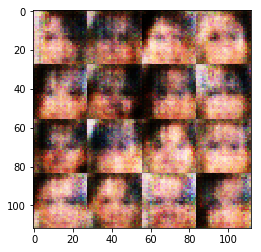

Epoch 1/1... Discriminator Loss: 0.7466... Generator Loss: 2.9032
Epoch 1/1... Discriminator Loss: 1.0896... Generator Loss: 0.8325
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 0.5742
Epoch 1/1... Discriminator Loss: 1.4630... Generator Loss: 0.4041
Epoch 1/1... Discriminator Loss: 0.8493... Generator Loss: 1.3617
Epoch 1/1... Discriminator Loss: 0.9751... Generator Loss: 0.8481
Epoch 1/1... Discriminator Loss: 0.9658... Generator Loss: 1.0849
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.4972
Epoch 1/1... Discriminator Loss: 0.6712... Generator Loss: 1.2131
Epoch 1/1... Discriminator Loss: 0.7380... Generator Loss: 1.4130


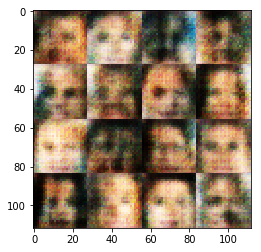

Epoch 1/1... Discriminator Loss: 1.0414... Generator Loss: 0.8441
Epoch 1/1... Discriminator Loss: 0.7769... Generator Loss: 2.1226
Epoch 1/1... Discriminator Loss: 1.6312... Generator Loss: 0.3179
Epoch 1/1... Discriminator Loss: 0.7547... Generator Loss: 2.2661
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 1.2991
Epoch 1/1... Discriminator Loss: 1.4796... Generator Loss: 0.4045
Epoch 1/1... Discriminator Loss: 0.8282... Generator Loss: 1.2386
Epoch 1/1... Discriminator Loss: 1.0167... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 0.8130... Generator Loss: 0.8976
Epoch 1/1... Discriminator Loss: 1.1829... Generator Loss: 0.5508


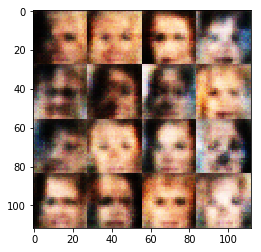

Epoch 1/1... Discriminator Loss: 0.4500... Generator Loss: 4.8853
Epoch 1/1... Discriminator Loss: 0.9075... Generator Loss: 0.8373
Epoch 1/1... Discriminator Loss: 2.0987... Generator Loss: 0.1664
Epoch 1/1... Discriminator Loss: 0.4170... Generator Loss: 3.7545
Epoch 1/1... Discriminator Loss: 2.2309... Generator Loss: 0.1479
Epoch 1/1... Discriminator Loss: 0.7128... Generator Loss: 2.1831
Epoch 1/1... Discriminator Loss: 1.1021... Generator Loss: 0.5622
Epoch 1/1... Discriminator Loss: 0.5281... Generator Loss: 3.5084
Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 0.6246
Epoch 1/1... Discriminator Loss: 1.1590... Generator Loss: 0.6252


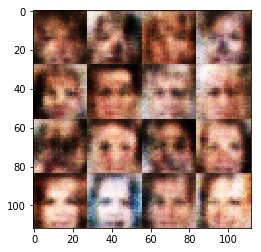

Epoch 1/1... Discriminator Loss: 0.8293... Generator Loss: 1.0523
Epoch 1/1... Discriminator Loss: 0.5286... Generator Loss: 1.5413
Epoch 1/1... Discriminator Loss: 0.9108... Generator Loss: 1.5314
Epoch 1/1... Discriminator Loss: 1.3412... Generator Loss: 0.4802
Epoch 1/1... Discriminator Loss: 0.6306... Generator Loss: 2.4117
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 0.4730
Epoch 1/1... Discriminator Loss: 0.9253... Generator Loss: 1.4828
Epoch 1/1... Discriminator Loss: 1.1406... Generator Loss: 0.7570
Epoch 1/1... Discriminator Loss: 0.7750... Generator Loss: 1.4014
Epoch 1/1... Discriminator Loss: 0.6347... Generator Loss: 2.0795


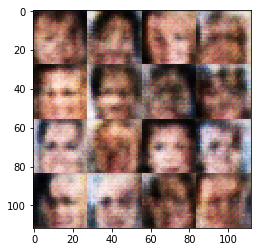

Epoch 1/1... Discriminator Loss: 0.6594... Generator Loss: 1.1920
Epoch 1/1... Discriminator Loss: 1.0822... Generator Loss: 0.6292
Epoch 1/1... Discriminator Loss: 0.6302... Generator Loss: 1.1556
Epoch 1/1... Discriminator Loss: 0.5193... Generator Loss: 1.7010
Epoch 1/1... Discriminator Loss: 0.4092... Generator Loss: 1.7015
Epoch 1/1... Discriminator Loss: 0.4642... Generator Loss: 1.5735
Epoch 1/1... Discriminator Loss: 0.4190... Generator Loss: 2.5496
Epoch 1/1... Discriminator Loss: 0.4313... Generator Loss: 1.7710
Epoch 1/1... Discriminator Loss: 0.6088... Generator Loss: 0.9817
Epoch 1/1... Discriminator Loss: 0.4966... Generator Loss: 1.6629


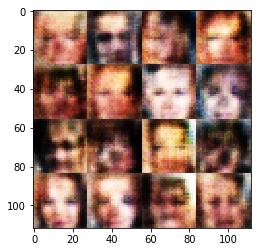

Epoch 1/1... Discriminator Loss: 0.8781... Generator Loss: 0.7154
Epoch 1/1... Discriminator Loss: 0.1859... Generator Loss: 2.9044
Epoch 1/1... Discriminator Loss: 0.2635... Generator Loss: 3.8280
Epoch 1/1... Discriminator Loss: 0.3006... Generator Loss: 2.3073
Epoch 1/1... Discriminator Loss: 0.6337... Generator Loss: 4.8884
Epoch 1/1... Discriminator Loss: 0.7496... Generator Loss: 0.8625
Epoch 1/1... Discriminator Loss: 0.1767... Generator Loss: 2.5129
Epoch 1/1... Discriminator Loss: 0.3146... Generator Loss: 2.5730
Epoch 1/1... Discriminator Loss: 0.7406... Generator Loss: 0.8638
Epoch 1/1... Discriminator Loss: 0.4236... Generator Loss: 1.7206


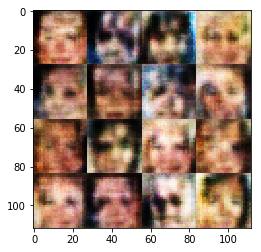

Epoch 1/1... Discriminator Loss: 0.6141... Generator Loss: 2.1289
Epoch 1/1... Discriminator Loss: 0.4407... Generator Loss: 2.3593
Epoch 1/1... Discriminator Loss: 0.2082... Generator Loss: 3.1992
Epoch 1/1... Discriminator Loss: 0.3656... Generator Loss: 2.3351
Epoch 1/1... Discriminator Loss: 0.3440... Generator Loss: 3.6854
Epoch 1/1... Discriminator Loss: 1.9242... Generator Loss: 0.2004
Epoch 1/1... Discriminator Loss: 0.2260... Generator Loss: 4.3099
Epoch 1/1... Discriminator Loss: 0.8537... Generator Loss: 1.3961
Epoch 1/1... Discriminator Loss: 0.6712... Generator Loss: 2.8849
Epoch 1/1... Discriminator Loss: 0.5472... Generator Loss: 2.2075


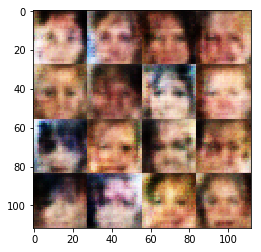

Epoch 1/1... Discriminator Loss: 0.9253... Generator Loss: 1.3602
Epoch 1/1... Discriminator Loss: 0.3743... Generator Loss: 4.4712
Epoch 1/1... Discriminator Loss: 0.6503... Generator Loss: 1.2224
Epoch 1/1... Discriminator Loss: 1.5785... Generator Loss: 0.3575
Epoch 1/1... Discriminator Loss: 0.3558... Generator Loss: 2.6850
Epoch 1/1... Discriminator Loss: 0.7801... Generator Loss: 1.0014
Epoch 1/1... Discriminator Loss: 1.7499... Generator Loss: 0.2757
Epoch 1/1... Discriminator Loss: 1.2187... Generator Loss: 0.6648
Epoch 1/1... Discriminator Loss: 0.7986... Generator Loss: 1.7378
Epoch 1/1... Discriminator Loss: 1.1558... Generator Loss: 0.8060


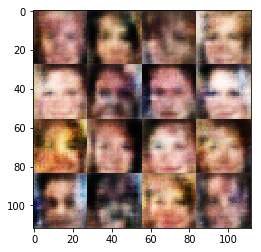

Epoch 1/1... Discriminator Loss: 1.2995... Generator Loss: 1.0530
Epoch 1/1... Discriminator Loss: 0.6094... Generator Loss: 1.6921
Epoch 1/1... Discriminator Loss: 1.2073... Generator Loss: 2.0018
Epoch 1/1... Discriminator Loss: 1.0096... Generator Loss: 1.1392
Epoch 1/1... Discriminator Loss: 0.6474... Generator Loss: 2.2392
Epoch 1/1... Discriminator Loss: 0.7198... Generator Loss: 1.1041
Epoch 1/1... Discriminator Loss: 0.9001... Generator Loss: 1.1331
Epoch 1/1... Discriminator Loss: 0.9182... Generator Loss: 1.1913
Epoch 1/1... Discriminator Loss: 0.9760... Generator Loss: 1.0411
Epoch 1/1... Discriminator Loss: 0.5763... Generator Loss: 2.3054


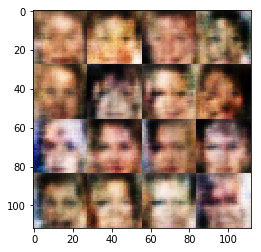

Epoch 1/1... Discriminator Loss: 0.8478... Generator Loss: 1.7322
Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 0.6067
Epoch 1/1... Discriminator Loss: 0.8284... Generator Loss: 1.1206
Epoch 1/1... Discriminator Loss: 1.0048... Generator Loss: 1.0636
Epoch 1/1... Discriminator Loss: 1.0057... Generator Loss: 0.9801
Epoch 1/1... Discriminator Loss: 0.6934... Generator Loss: 1.3526
Epoch 1/1... Discriminator Loss: 0.9357... Generator Loss: 1.3146
Epoch 1/1... Discriminator Loss: 0.9062... Generator Loss: 1.1044
Epoch 1/1... Discriminator Loss: 1.0731... Generator Loss: 0.6353
Epoch 1/1... Discriminator Loss: 1.1593... Generator Loss: 0.8178


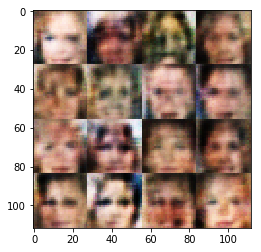

Epoch 1/1... Discriminator Loss: 0.9833... Generator Loss: 0.8862
Epoch 1/1... Discriminator Loss: 0.9257... Generator Loss: 0.8121
Epoch 1/1... Discriminator Loss: 1.0786... Generator Loss: 0.8763
Epoch 1/1... Discriminator Loss: 1.2503... Generator Loss: 0.9543
Epoch 1/1... Discriminator Loss: 0.5719... Generator Loss: 1.8654
Epoch 1/1... Discriminator Loss: 0.9451... Generator Loss: 1.1603
Epoch 1/1... Discriminator Loss: 1.1923... Generator Loss: 0.8541
Epoch 1/1... Discriminator Loss: 0.9367... Generator Loss: 1.0696
Epoch 1/1... Discriminator Loss: 0.7602... Generator Loss: 2.8282
Epoch 1/1... Discriminator Loss: 0.6176... Generator Loss: 1.7589


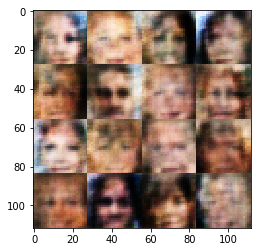

Epoch 1/1... Discriminator Loss: 1.0162... Generator Loss: 1.0020
Epoch 1/1... Discriminator Loss: 0.8105... Generator Loss: 1.2987
Epoch 1/1... Discriminator Loss: 1.0383... Generator Loss: 0.8239
Epoch 1/1... Discriminator Loss: 0.8028... Generator Loss: 1.1892
Epoch 1/1... Discriminator Loss: 0.7489... Generator Loss: 1.2832
Epoch 1/1... Discriminator Loss: 0.8611... Generator Loss: 1.1249
Epoch 1/1... Discriminator Loss: 1.1373... Generator Loss: 0.8029
Epoch 1/1... Discriminator Loss: 1.0095... Generator Loss: 1.0305
Epoch 1/1... Discriminator Loss: 1.0324... Generator Loss: 1.2695
Epoch 1/1... Discriminator Loss: 0.9644... Generator Loss: 0.9468


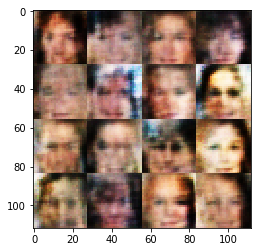

Epoch 1/1... Discriminator Loss: 1.0384... Generator Loss: 1.3928
Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 0.8575
Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 1.0715
Epoch 1/1... Discriminator Loss: 1.1325... Generator Loss: 0.8011
Epoch 1/1... Discriminator Loss: 0.9916... Generator Loss: 0.9235
Epoch 1/1... Discriminator Loss: 0.6776... Generator Loss: 1.1847
Epoch 1/1... Discriminator Loss: 1.0217... Generator Loss: 0.9394
Epoch 1/1... Discriminator Loss: 1.0688... Generator Loss: 0.7689
Epoch 1/1... Discriminator Loss: 1.0051... Generator Loss: 0.8051
Epoch 1/1... Discriminator Loss: 1.0691... Generator Loss: 0.8959


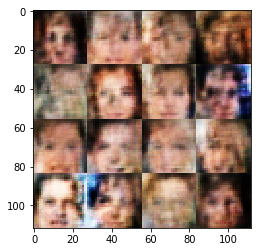

Epoch 1/1... Discriminator Loss: 1.1275... Generator Loss: 0.9024
Epoch 1/1... Discriminator Loss: 0.9323... Generator Loss: 1.0694
Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 1.2130
Epoch 1/1... Discriminator Loss: 1.0064... Generator Loss: 0.8253
Epoch 1/1... Discriminator Loss: 1.0378... Generator Loss: 0.9431
Epoch 1/1... Discriminator Loss: 1.0631... Generator Loss: 0.7031
Epoch 1/1... Discriminator Loss: 0.8733... Generator Loss: 1.4826
Epoch 1/1... Discriminator Loss: 1.0485... Generator Loss: 0.8528
Epoch 1/1... Discriminator Loss: 1.0596... Generator Loss: 0.9615
Epoch 1/1... Discriminator Loss: 1.1005... Generator Loss: 0.8315


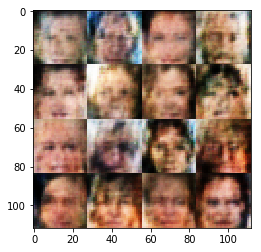

Epoch 1/1... Discriminator Loss: 1.1215... Generator Loss: 1.1112
Epoch 1/1... Discriminator Loss: 0.8273... Generator Loss: 1.4192
Epoch 1/1... Discriminator Loss: 0.9984... Generator Loss: 0.9056
Epoch 1/1... Discriminator Loss: 1.2716... Generator Loss: 0.7098
Epoch 1/1... Discriminator Loss: 0.9857... Generator Loss: 1.0144
Epoch 1/1... Discriminator Loss: 1.0982... Generator Loss: 1.0905
Epoch 1/1... Discriminator Loss: 1.2242... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 1.1665... Generator Loss: 0.6668
Epoch 1/1... Discriminator Loss: 1.1396... Generator Loss: 0.9712
Epoch 1/1... Discriminator Loss: 1.2281... Generator Loss: 0.5653


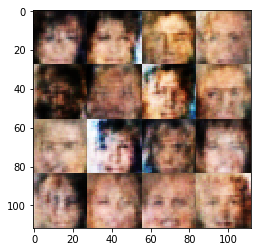

Epoch 1/1... Discriminator Loss: 1.2349... Generator Loss: 1.0631
Epoch 1/1... Discriminator Loss: 1.0435... Generator Loss: 0.9056
Epoch 1/1... Discriminator Loss: 1.1803... Generator Loss: 1.0931
Epoch 1/1... Discriminator Loss: 1.1063... Generator Loss: 1.0853
Epoch 1/1... Discriminator Loss: 0.9167... Generator Loss: 1.2587
Epoch 1/1... Discriminator Loss: 1.2697... Generator Loss: 0.7225
Epoch 1/1... Discriminator Loss: 1.4028... Generator Loss: 1.3138
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 1.0975
Epoch 1/1... Discriminator Loss: 1.1597... Generator Loss: 0.9607
Epoch 1/1... Discriminator Loss: 1.0759... Generator Loss: 1.0514


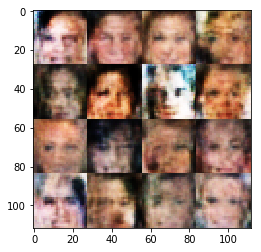

Epoch 1/1... Discriminator Loss: 1.1927... Generator Loss: 0.8315
Epoch 1/1... Discriminator Loss: 0.9610... Generator Loss: 1.0254
Epoch 1/1... Discriminator Loss: 1.0092... Generator Loss: 1.0830
Epoch 1/1... Discriminator Loss: 1.1738... Generator Loss: 0.7612
Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 1.1497
Epoch 1/1... Discriminator Loss: 1.2541... Generator Loss: 0.7614
Epoch 1/1... Discriminator Loss: 1.0878... Generator Loss: 1.0182
Epoch 1/1... Discriminator Loss: 1.2711... Generator Loss: 0.7687
Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.4089... Generator Loss: 0.5143


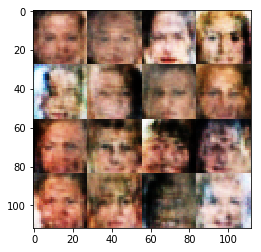

Epoch 1/1... Discriminator Loss: 0.9812... Generator Loss: 1.0054
Epoch 1/1... Discriminator Loss: 1.1231... Generator Loss: 0.9253
Epoch 1/1... Discriminator Loss: 1.0905... Generator Loss: 0.7189
Epoch 1/1... Discriminator Loss: 1.1370... Generator Loss: 1.0647
Epoch 1/1... Discriminator Loss: 0.9594... Generator Loss: 0.9726
Epoch 1/1... Discriminator Loss: 1.9353... Generator Loss: 0.2277
Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 0.7574
Epoch 1/1... Discriminator Loss: 1.2295... Generator Loss: 0.6127
Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.8388
Epoch 1/1... Discriminator Loss: 1.2138... Generator Loss: 0.7807


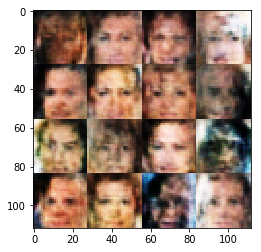

Epoch 1/1... Discriminator Loss: 1.4475... Generator Loss: 0.5419
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.4411
Epoch 1/1... Discriminator Loss: 0.7707... Generator Loss: 1.8081
Epoch 1/1... Discriminator Loss: 1.1561... Generator Loss: 0.8375
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 1.1587... Generator Loss: 0.8774
Epoch 1/1... Discriminator Loss: 0.9993... Generator Loss: 1.1355
Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 0.6581
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 1.2510


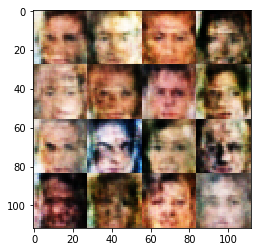

Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.8276
Epoch 1/1... Discriminator Loss: 0.7083... Generator Loss: 1.7475
Epoch 1/1... Discriminator Loss: 1.2991... Generator Loss: 0.6564
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.8108
Epoch 1/1... Discriminator Loss: 1.0736... Generator Loss: 1.0721
Epoch 1/1... Discriminator Loss: 1.1451... Generator Loss: 0.7062
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.5953
Epoch 1/1... Discriminator Loss: 1.3121... Generator Loss: 0.9519
Epoch 1/1... Discriminator Loss: 1.2664... Generator Loss: 0.6306
Epoch 1/1... Discriminator Loss: 1.4784... Generator Loss: 0.4734


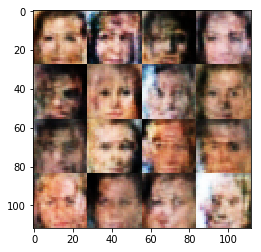

Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 0.7944
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.8457
Epoch 1/1... Discriminator Loss: 1.0783... Generator Loss: 1.1204
Epoch 1/1... Discriminator Loss: 1.3212... Generator Loss: 0.6262
Epoch 1/1... Discriminator Loss: 1.2841... Generator Loss: 0.6596
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.5332
Epoch 1/1... Discriminator Loss: 1.2536... Generator Loss: 0.7399
Epoch 1/1... Discriminator Loss: 1.0680... Generator Loss: 0.8560
Epoch 1/1... Discriminator Loss: 0.6657... Generator Loss: 1.1661
Epoch 1/1... Discriminator Loss: 1.4046... Generator Loss: 0.5365


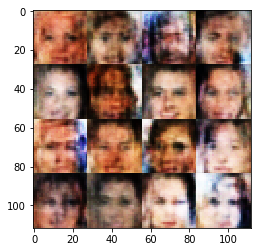

Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 0.7482... Generator Loss: 1.2170
Epoch 1/1... Discriminator Loss: 1.2641... Generator Loss: 0.8449
Epoch 1/1... Discriminator Loss: 1.2891... Generator Loss: 0.7543
Epoch 1/1... Discriminator Loss: 1.3146... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.6654
Epoch 1/1... Discriminator Loss: 1.3608... Generator Loss: 0.7093
Epoch 1/1... Discriminator Loss: 1.2414... Generator Loss: 0.8267
Epoch 1/1... Discriminator Loss: 1.2459... Generator Loss: 0.7320
Epoch 1/1... Discriminator Loss: 1.1047... Generator Loss: 1.1579


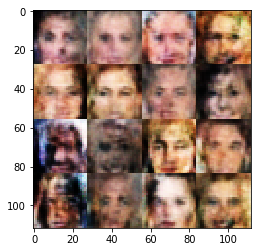

Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 0.7473
Epoch 1/1... Discriminator Loss: 1.2608... Generator Loss: 0.9312
Epoch 1/1... Discriminator Loss: 1.4533... Generator Loss: 0.4931
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.7778
Epoch 1/1... Discriminator Loss: 1.4167... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.1965... Generator Loss: 0.8912
Epoch 1/1... Discriminator Loss: 1.2006... Generator Loss: 0.8595
Epoch 1/1... Discriminator Loss: 1.3834... Generator Loss: 0.7087
Epoch 1/1... Discriminator Loss: 1.4346... Generator Loss: 0.6816
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 0.7186


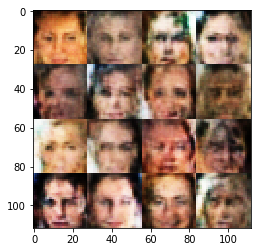

Epoch 1/1... Discriminator Loss: 1.3302... Generator Loss: 0.7019
Epoch 1/1... Discriminator Loss: 1.2943... Generator Loss: 0.7859
Epoch 1/1... Discriminator Loss: 1.3807... Generator Loss: 0.6822
Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 0.6262
Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.7137
Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.9277
Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.5793
Epoch 1/1... Discriminator Loss: 1.1360... Generator Loss: 0.8634
Epoch 1/1... Discriminator Loss: 1.1422... Generator Loss: 0.9172
Epoch 1/1... Discriminator Loss: 1.4576... Generator Loss: 0.5812


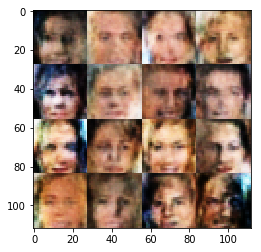

Epoch 1/1... Discriminator Loss: 1.2521... Generator Loss: 0.8368
Epoch 1/1... Discriminator Loss: 1.1044... Generator Loss: 1.0520
Epoch 1/1... Discriminator Loss: 1.1858... Generator Loss: 0.8225
Epoch 1/1... Discriminator Loss: 1.5554... Generator Loss: 1.3704
Epoch 1/1... Discriminator Loss: 1.4891... Generator Loss: 1.0686
Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 0.7745
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 1.0937
Epoch 1/1... Discriminator Loss: 1.3478... Generator Loss: 0.5818
Epoch 1/1... Discriminator Loss: 1.3971... Generator Loss: 0.7071
Epoch 1/1... Discriminator Loss: 1.2747... Generator Loss: 0.7026


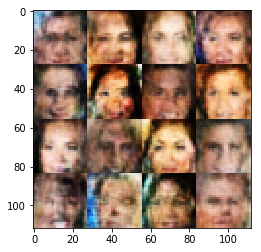

Epoch 1/1... Discriminator Loss: 1.3511... Generator Loss: 0.8155
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.6652
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.6453
Epoch 1/1... Discriminator Loss: 1.0695... Generator Loss: 0.9546
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 0.9409
Epoch 1/1... Discriminator Loss: 1.1113... Generator Loss: 0.9738
Epoch 1/1... Discriminator Loss: 0.7777... Generator Loss: 1.1834
Epoch 1/1... Discriminator Loss: 1.4538... Generator Loss: 0.3468
Epoch 1/1... Discriminator Loss: 1.4661... Generator Loss: 0.5968


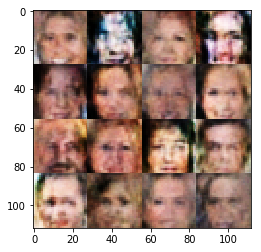

Epoch 1/1... Discriminator Loss: 1.4487... Generator Loss: 0.7003
Epoch 1/1... Discriminator Loss: 1.1121... Generator Loss: 0.9221
Epoch 1/1... Discriminator Loss: 1.2747... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.3205... Generator Loss: 0.6412
Epoch 1/1... Discriminator Loss: 1.0568... Generator Loss: 0.9747
Epoch 1/1... Discriminator Loss: 1.1305... Generator Loss: 0.8325
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 0.7374
Epoch 1/1... Discriminator Loss: 1.3426... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.0793... Generator Loss: 0.8095
Epoch 1/1... Discriminator Loss: 0.9185... Generator Loss: 1.0207


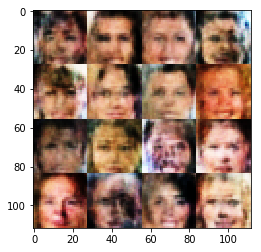

Epoch 1/1... Discriminator Loss: 1.0361... Generator Loss: 0.8295
Epoch 1/1... Discriminator Loss: 0.9164... Generator Loss: 0.9715
Epoch 1/1... Discriminator Loss: 0.8626... Generator Loss: 1.1116
Epoch 1/1... Discriminator Loss: 1.4579... Generator Loss: 1.0342
Epoch 1/1... Discriminator Loss: 1.2664... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.2798... Generator Loss: 0.6752
Epoch 1/1... Discriminator Loss: 0.9977... Generator Loss: 0.9386
Epoch 1/1... Discriminator Loss: 1.1110... Generator Loss: 0.9372
Epoch 1/1... Discriminator Loss: 1.0088... Generator Loss: 0.7550
Epoch 1/1... Discriminator Loss: 1.4855... Generator Loss: 0.3661


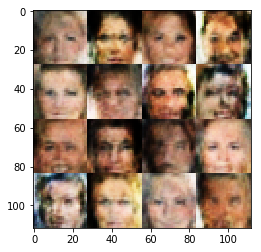

Epoch 1/1... Discriminator Loss: 1.2431... Generator Loss: 0.8484
Epoch 1/1... Discriminator Loss: 1.1694... Generator Loss: 0.9690
Epoch 1/1... Discriminator Loss: 1.4035... Generator Loss: 0.6944
Epoch 1/1... Discriminator Loss: 1.5711... Generator Loss: 0.6212
Epoch 1/1... Discriminator Loss: 1.4171... Generator Loss: 0.5841
Epoch 1/1... Discriminator Loss: 0.9986... Generator Loss: 0.8277


In [115]:
batch_size =64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.